In [48]:
import pandas as pd
import numpy as np

In [49]:
imdb1 = pd.read_csv('imdb_pt1.csv')
imdb2 = pd.read_csv('imdb_pt2.csv')

In [50]:
imdb = pd.merge(imdb1, imdb2, on ='title')

In [51]:
imdb = imdb[['title','genre','MPAA_rating', 'gross','director','actors','imdb_rating', 
             'meta_rating', 'run_time','release_date', 'non_USusers', 
             'male_elder_rating','us_users', 'male_adult_rating', 'male_youngAdult_rating',
             'female_ratingCount', 'female_adult_rating',
             'female_teen_rating', 'female_elder_rating', 'female_youngAdult_rating',
             'male_teen_rating', 'male_ratingCount']]

In [52]:
imdb_test = imdb.copy()

In [53]:
#imdb["gross"][imdb.isnull().any(axis=1)]

In [54]:
imdb[imdb.isnull().any(axis=1)]
imdb_test.dropna(subset=["meta_rating"])

,title,genre,MPAA_rating,gross,director,actors,imdb_rating,meta_rating,run_time,release_date,...,us_users,male_adult_rating,male_youngAdult_rating,female_ratingCount,female_adult_rating,female_teen_rating,female_elder_rating,female_youngAdult_rating,male_teen_rating,male_ratingCount
0,Avengers: Infinity War,"Action, Adventure, Fantasy",PG-13,486.01,Anthony Russo,Robert Downey Jr.,8.9,68.0,149,27 April 2018 (USA),...,8.8,8.7,8.9,27522.0,8.6,9.4,8.6,8.9,9.2,182928.0
1,Black Panther,"Action, Adventure, Sci-Fi",PG-13,694.25,Ryan Coogler,Chadwick Boseman,7.6,88.0,134,16 February 2018 (USA),...,7.9,7.3,7.6,37253.0,8.0,8.7,8.2,8.2,8.1,165087.0
2,A Quiet Place,"Drama, Horror, Sci-Fi",PG-13,163.15,John Krasinski,Emily Blunt,8.0,82.0,90,6 April 2018 (USA),...,8.1,7.9,8.0,14319.0,8.0,8.5,8.2,8.2,8.2,52736.0
3,Thor: Ragnarok,"Action, Adventure, Comedy",PG-13,315.06,Taika Waititi,Chris Hemsworth,7.9,74.0,130,3 November 2017 (USA),...,8.1,7.8,7.9,38929.0,8.1,8.7,8.1,8.2,8.3,199177.0
4,The Greatest Showman,"Biography, Drama, Musical",PG,173.82,Michael Gracey,Hugh Jackman,7.8,48.0,105,20 December 2017 (USA),...,7.8,7.4,7.6,29779.0,8.1,8.7,8.3,8.2,7.9,55131.0
5,Ready Player One,"Action, Adventure, Sci-Fi",PG-13,133.67,Steven Spielberg,Tye Sheridan,7.8,64.0,140,29 March 2018 (USA),...,7.7,7.7,7.8,11965.0,7.7,8.1,7.6,7.8,8.1,71700.0
6,Den of Thieves,"Action, Crime, Drama",R,44.95,Christian Gudegast,Gerard Butler,7.0,49.0,140,19 January 2018 (USA),...,7.0,6.9,7.1,2216.0,6.8,7.3,7.0,7.1,7.9,20976.0
7,Avengers: Age of Ultron,"Action, Adventure, Sci-Fi",PG-13,459.01,Joss Whedon,Robert Downey Jr.,7.4,66.0,141,1 May 2015 (USA),...,7.5,7.2,7.4,67695.0,7.5,8.2,7.5,7.7,7.4,361097.0
8,The Avengers,"Action, Adventure, Sci-Fi",PG-13,623.36,Joss Whedon,Robert Downey Jr.,8.1,69.0,143,4 May 2012 (USA),...,8.3,8.0,8.1,156644.0,8.1,8.5,8.2,8.3,8.2,715163.0
9,Guardians of the Galaxy,"Action, Adventure, Sci-Fi",PG-13,333.18,James Gunn,Chris Pratt,8.1,76.0,121,1 August 2014 (USA),...,8.3,7.9,8.1,109537.0,8.0,8.5,8.1,8.1,8.4,522633.0


In [55]:
#droping all rows with NAs in meta_rating and male_teen_rating
imdb_test = imdb_test.dropna(subset=["male_teen_rating"])
imdb_test = imdb_test.dropna(subset=["meta_rating"]) 
#imdb_test[imdb_test.isnull().any(axis=1)]

In [56]:
#changing rating counts into int type
imdb_test.loc[:,"female_ratingCount"] = imdb_test.loc[:,"female_ratingCount"].astype(int)
imdb_test.loc[:,"male_ratingCount"] = imdb_test.loc[:,"male_ratingCount"].astype(int)
imdb_test.loc[:,"meta_rating"] = imdb_test.loc[:,"meta_rating"].astype(int)

In [57]:
# converting release_date into datetime format
import re

def split_it(year):
    return re.findall('(\d+ \w+ \d+)', year)

imdb_test['release_date'] = imdb_test['release_date'].apply(split_it)
imdb_test['release_date'] = imdb_test['release_date'].apply(lambda x: ','.join(map(str, x)))
imdb_test['release_date']= pd.to_datetime(imdb_test['release_date'])

In [58]:
imdb_test["totalMale_rating"] = imdb_test[['male_elder_rating', 'male_adult_rating',
       'male_youngAdult_rating','male_teen_rating']].mean(axis=1).round(1)

In [60]:
imdb_test["totalFemale_rating"] = imdb_test[['female_adult_rating',
       'female_teen_rating', 'female_elder_rating', 'female_youngAdult_rating']].mean(axis=1).round(1)

In [70]:
imdb_test.head()

,title,genre,MPAA_rating,gross,director,actors,imdb_rating,meta_rating,run_time,release_date,...,male_youngAdult_rating,female_ratingCount,female_adult_rating,female_teen_rating,female_elder_rating,female_youngAdult_rating,male_teen_rating,male_ratingCount,totalMale_rating,totalFemale_rating
0,Avengers: Infinity War,"Action, Adventure, Fantasy",PG-13,486.01,Anthony Russo,Robert Downey Jr.,8.9,68,149,2018-04-27,...,8.9,27522,8.6,9.4,8.6,8.9,9.2,182928,8.8,8.9
1,Black Panther,"Action, Adventure, Sci-Fi",PG-13,694.25,Ryan Coogler,Chadwick Boseman,7.6,88,134,2018-02-16,...,7.6,37253,8.0,8.7,8.2,8.2,8.1,165087,7.6,8.3
2,A Quiet Place,"Drama, Horror, Sci-Fi",PG-13,163.15,John Krasinski,Emily Blunt,8.0,82,90,2018-04-06,...,8.0,14319,8.0,8.5,8.2,8.2,8.2,52736,8.0,8.2
3,Thor: Ragnarok,"Action, Adventure, Comedy",PG-13,315.06,Taika Waititi,Chris Hemsworth,7.9,74,130,2017-11-03,...,7.9,38929,8.1,8.7,8.1,8.2,8.3,199177,7.9,8.3
4,The Greatest Showman,"Biography, Drama, Musical",PG,173.82,Michael Gracey,Hugh Jackman,7.8,48,105,2017-12-20,...,7.6,29779,8.1,8.7,8.3,8.2,7.9,55131,7.6,8.3


In [59]:
imdb_test['genre'] = imdb_test['genre'].str.strip(" ,")

In [61]:
imdb_genre = imdb_test.copy()
imdb_genre.genre = imdb_test.genre.str.split(',')

In [62]:
# i keeps tracks of index
index=0
# save [index, genre] in a nested list
list_ = []
for item in imdb_genre.genre:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
genre = pd.DataFrame(list_, columns=['index', 'genre'])
#imdb_test.genre

In [63]:
imdb_genre = pd.merge(imdb_genre.drop('genre', axis=1), genre, how='right', left_index=True, right_on='index')

In [64]:
imdb_genre['genre'] = imdb_genre['genre'].str.strip(" ,")

In [157]:
AdamS = imdb_test.loc[imdb_test.actors == "Adam Sandler", :].dropna(subset=["gross"])
AdamS

,title,genre,MPAA_rating,gross,director,actors,imdb_rating,meta_rating,run_time,release_date,...,male_youngAdult_rating,female_ratingCount,female_adult_rating,female_teen_rating,female_elder_rating,female_youngAdult_rating,male_teen_rating,male_ratingCount,totalMale_rating,totalFemale_rating
229,50 First Dates,"Comedy, Drama, Romance",PG-13,120.91,Peter Segal,Adam Sandler,6.8,48,99,2004-02-13,...,6.8,71831,6.9,7.1,7.0,6.9,6.9,170100,6.8,7.0
365,Just Go with It,"Comedy, Romance",PG-13,103.03,Dennis Dugan,Adam Sandler,6.4,33,117,2011-02-11,...,6.4,52666,6.4,7.5,6.4,6.7,6.4,108765,6.3,6.8
404,Pixels,"Action, Comedy, Fantasy",PG-13,78.75,Chris Columbus,Adam Sandler,5.6,27,105,2015-07-24,...,5.5,13448,5.8,6.7,5.9,5.9,5.4,73031,5.5,6.1
459,Blended,"Comedy, Romance",PG-13,46.29,Frank Coraci,Adam Sandler,6.5,31,117,2014-05-23,...,6.6,24709,6.6,7.9,6.7,7.0,6.4,55501,6.4,7.0
489,The Longest Yard,"Comedy, Crime, Sport",PG-13,158.12,Peter Segal,Adam Sandler,6.4,48,113,2005-05-27,...,6.6,14516,6.3,6.7,6.2,6.6,6.3,104683,6.2,6.4
640,Grown Ups 2,Comedy,PG-13,133.67,Dennis Dugan,Adam Sandler,5.4,19,101,2013-07-12,...,5.5,19075,5.5,6.9,5.6,6.0,5.0,78403,5.1,6.0
648,Grown Ups,Comedy,PG-13,162.00,Dennis Dugan,Adam Sandler,6.0,30,102,2010-06-25,...,6.1,33566,5.9,7.4,6.0,6.4,5.7,134069,5.8,6.4
1360,Eight Crazy Nights,"Animation, Comedy, Musical",PG-13,23.44,Seth Kearsley,Adam Sandler,5.3,23,76,2002-11-27,...,5.7,2578,5.5,5.1,5.0,6.1,4.4,13409,4.9,5.4
2099,Reign Over Me,Drama,R,19.66,Mike Binder,Adam Sandler,7.5,61,124,2007-03-23,...,7.7,11755,7.3,8.0,7.4,7.5,7.8,65013,7.6,7.6
2353,Mr. Deeds,"Comedy, Romance",PG-13,126.29,Steven Brill,Adam Sandler,5.8,24,96,2002-06-28,...,6.0,16915,5.6,6.3,5.8,6.0,5.9,82257,5.8,5.9


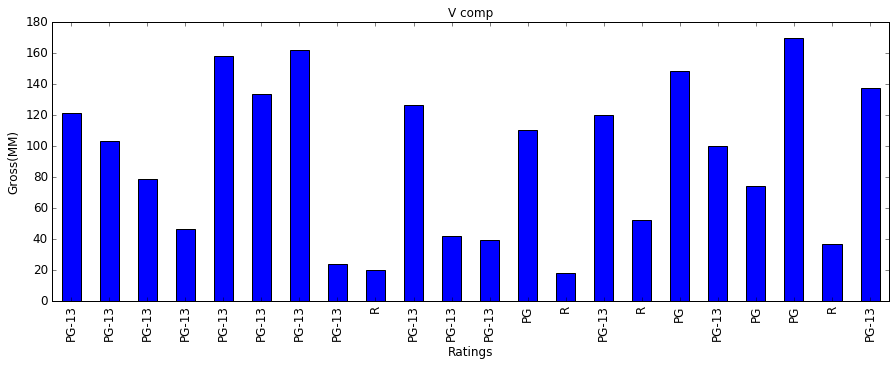

In [158]:
import matplotlib.pyplot as plt
ax = AdamS.plot(x = "MPAA_rating", y = "gross", kind='bar', title ="V comp", figsize=(15, 5), legend=False, fontsize=12)
ax.set_xlabel("Ratings", fontsize=12)
ax.set_ylabel("Gross(MM)", fontsize=12)
plt.show()

In [66]:
#imdb_test.loc[imdb_test.director == "Greg Mottola", :].dropna(subset=["gross"])

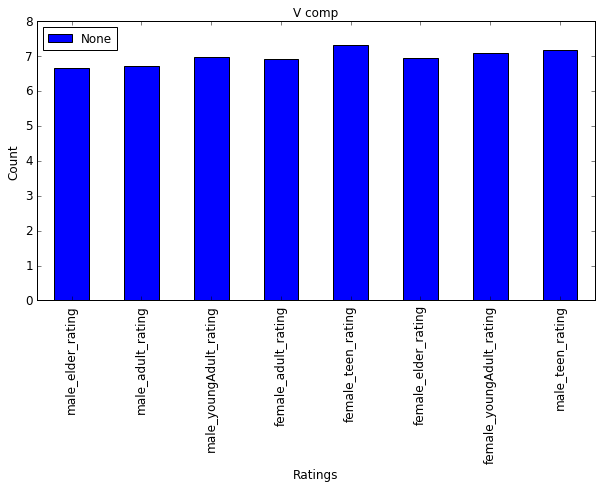

In [67]:
import matplotlib.pyplot as plt
ax = Romance[['male_elder_rating', 'male_adult_rating',
       'male_youngAdult_rating', 'female_adult_rating',
       'female_teen_rating', 'female_elder_rating', 'female_youngAdult_rating',
       'male_teen_rating']].mean().plot(kind='bar', title ="V comp", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Ratings", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [68]:
imdb_genre = imdb_genre.drop(imdb_genre[((imdb_genre.genre == 'News'))].index)

In [119]:
imdb_perc = imdb_genre[['genre','male_ratingCount','female_ratingCount']].groupby('genre')
imdb_perc

In [ ]:
Adams = Adams.groupby('genre')[]

In [71]:
test3 = imdb_genre.groupby('genre')['totalMale_rating','totalFemale_rating'].mean()
test3

,totalMale_rating,totalFemale_rating
genre,,
Action,6.486934,6.711902
Adventure,6.591602,6.813219
Animation,6.443103,6.686207
Biography,6.470588,6.666176
Comedy,6.320965,6.523246
Crime,6.398566,6.595699
Drama,6.394806,6.600000
Family,6.367956,6.613812
Fantasy,6.411071,6.630357


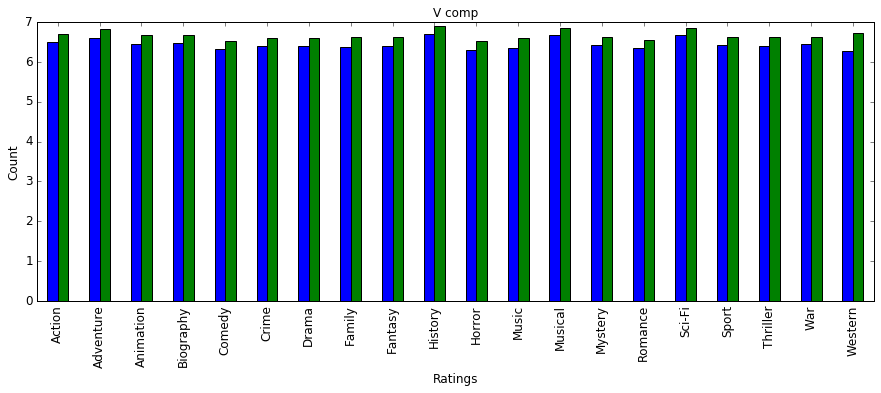

In [120]:
import matplotlib.pyplot as plt
ax = test3.plot(kind='bar', title ="V comp", figsize=(15, 5), legend=False, fontsize=12)
ax.set_xlabel("Ratings", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [ ]:
import plotly
from plotly.graph_objs import Figure, Histogram, Layout
from plotly.graph_objs import Bar

data = [Bar(x=test3['female_ratingCount'], y=test3['imdb_score'], text=country_df['country'])]
layout = Layout(title="Countries with Highest Median Imdb Score")

fig = Figure(data=test3, layout=layout)

plotly.offline.iplot(fig,show_link=False)

In [32]:
imdb_test[['male_elder_rating', 'male_adult_rating',
       'male_youngAdult_rating','male_teen_rating']].head()

,male_elder_rating,male_adult_rating,male_youngAdult_rating,male_teen_rating
0,8.5,8.7,8.9,9.2
1,7.2,7.3,7.6,8.1
2,7.8,7.9,8.0,8.2
3,7.7,7.8,7.9,8.3
4,7.6,7.4,7.6,7.9
